breast cancer classification using neural network

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
 df.drop(columns=['Unnamed: 32', 'id'], inplace=True, axis=1)

In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


label Encoding

**checking** distribution of target variable 

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels= le.fit_transform(df['diagnosis'])
df['Target']= labels
df.drop(columns='diagnosis', inplace= True, axis=0)

In [ ]:
df['Target'].value_counts()

0    357
1    212
Name: Target, dtype: int64

In [ ]:
df.groupby('Target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


 Separating the features and target

In [ ]:
X = df.drop(columns='Target', axis=1)
Y = df['Target']

# Splitting the data into Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test) # do not fit to tranform

In [ ]:
X_test_std

array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [ 0.72709489,  0.45836817,  0.75277276, ...,  1.46701686,
         1.19909344,  0.65319961],
       [ 0.25437907,  1.33054477,  0.15659489, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [ 0.84100232, -0.06676434,  0.8929529 , ...,  2.15137705,
         0.35629355,  0.37459546]])

# importing libraries for NN

In [ ]:
import tensorflow as tf 
tf.random.set_seed(3)  #same as random state in machine learning
from tensorflow import keras
from keras import regularizers

In [ ]:
#Layer setup
#a sequential model is a linear stack of layers, where you can add a single layer at a time, and each layer is connected to the previous one.
model= keras.Sequential([                                           
                          keras.layers.Flatten(input_shape=(30,)), # input layer as a 1D
                          keras.layers.Dense(20, activation='relu',kernel_regularizer=regularizers.l2(0.01)), #hidden layer (ReLU is typically used as the activation function in the hidden layers of a neural network. )
                          keras.layers.Dense(2,activation='sigmoid')  #output layer (Sigmoid is another popular choice for activation functions, especially in binary classification problems)
                        ])

In [ ]:
#compiling the Neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              

In [ ]:
#training the Neural Network
new=model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 0.7946 - accuracy: 0.6724 - val_loss: 0.7185 - val_accuracy: 0.8261
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6222 - accuracy: 0.8533 - val_loss: 0.5771 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5274 - accuracy: 0.9022 - val_loss: 0.5040 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.9218 - val_loss: 0.4610 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.9315 - val_loss: 0.4308 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4037 - accuracy: 0.9389 - val_loss: 0.4076 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3810 - accuracy: 0.9389 - val_loss: 0.3878 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

***Visualisation loss and accuracy ***

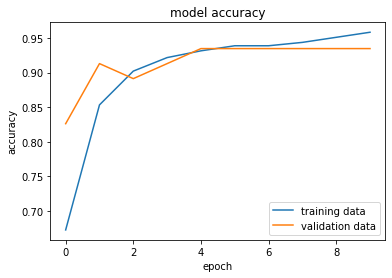

In [ ]:
plt.plot(new.history['accuracy'])
plt.plot(new.history['val_accuracy']) #validation accuracy 

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

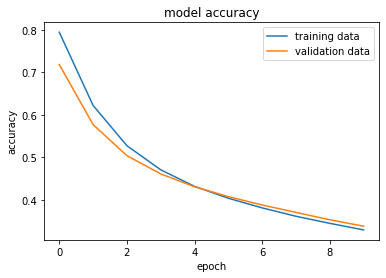

In [ ]:
plt.plot(new.history['loss'])
plt.plot(new.history['val_loss']) #validation loss

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#Accuracy of the model in test data 

In [27]:
loss, accuracy =model.evaluate(X_test_std, Y_test)
print('accuracy')

4/4 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.9386
accuracy


In [28]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [29]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 2ms/step


In [30]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.8423966  0.75114995]


here it shows the prediction probability of labels

In [33]:

print(Y_pred)


[[8.4239662e-01 7.5114995e-01]
 [4.7149009e-01 5.4581910e-01]
 [9.8494714e-01 1.7708835e-01]
 [1.2897809e-04 9.9764240e-01]
 [7.0783079e-01 5.8069259e-01]
 [3.0469687e-03 9.4411588e-01]
 [8.5038257e-01 4.0215689e-01]
 [9.8089856e-01 2.9942790e-01]
 [9.2153543e-01 3.5819006e-01]
 [9.4599545e-01 4.5834219e-01]
 [6.9435287e-01 4.6262020e-01]
 [8.3381504e-01 3.4931180e-01]
 [9.4640529e-01 5.7219630e-01]
 [8.1463718e-01 4.4532052e-01]
 [9.6421736e-01 2.9448053e-01]
 [1.7055763e-01 8.7292695e-01]
 [9.6655566e-01 2.7021864e-01]
 [9.7291851e-01 3.9274764e-01]
 [9.4931453e-01 3.8587230e-01]
 [6.6267145e-03 9.5515370e-01]
 [9.9469435e-01 9.6802711e-01]
 [9.6456957e-01 2.3489332e-01]
 [9.1177541e-01 3.5592297e-01]
 [9.8218787e-01 3.4595928e-01]
 [9.1467607e-01 5.2849215e-01]
 [3.7936721e-02 9.4605643e-01]
 [8.5475981e-01 3.8164210e-01]
 [8.1923342e-01 5.7590228e-01]
 [1.1778194e-01 9.2491198e-01]
 [5.3538237e-02 9.3505824e-01]
 [9.0078866e-01 6.3414192e-01]
 [9.4488889e-01 3.8859585e-01]
 [9.6585

In [34]:
#by using argmax function converting the propbabilty of prediction to class lables
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


**predictive system**

In [41]:
input = (11.45,20.97,73.81,401.5,0.1102,0.09362,0.04591,0.02233,0.1842,0.07005,0.3251,2.174,2.077,24.62,0.01037,0.01706,0.02586,0.007506,0.01816,0.003976,13.11,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851

)

# change the input_data to a numpy array
input_as_numpy_array = np.asarray(input)

# reshape the numpy array as we are predicting for one data point
input_reshaped = input_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_std = scaler.transform(input_reshaped)

prediction = model.predict(input_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 1):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 15ms/step
[[0.9035492 0.4012986]]
[0]
The tumor is Benign
